In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['errorbar.capsize']=2

In [2]:
#silver decay

#load and calculate underground
unterg=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtuntergrund.dat', usecols=[1])
mittelw_unterg=np.mean(4*unterg)
err_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert des Untegrunds(Silber): ', mittelw_unterg,'+-', err_unterg)

#load measured data
n1=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtag1.dat', usecols=[1])
n2=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtag2.dat', usecols=[1])
n3=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtag3.dat', usecols=[1])
n4=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtag4.dat', usecols=[1])

#total data
N=n1+n2+n3+n4
err_N=np.sqrt(N)
t=np.arange(6,406,10)

#fit function, silver
def fit_func(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0

Mittelwert des Untegrunds(Silber):  87.2653061224 +- 2.98974723234


A1=4.00e+02 , Standardfehler=1.9e+01
l1=2.59e-02 , Standardfehler=2.3e-03
A2=5.31e+01 , Standardfehler=1.1e+01
l2=1.2e-03 , Standardfehler=8e-04
chi2_= 26.2253054645
chi2_red= 0.728480707348
Wahrscheinlichkeit= 88.0 %


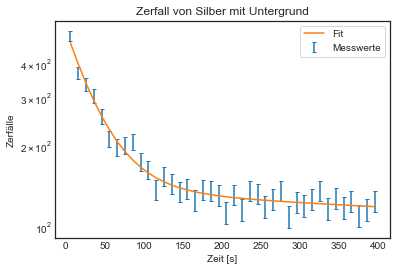

In [3]:
#fitting silver decay
y0=mittelw_unterg
popt, pcov=curve_fit(fit_func,t,N, p0=[391, 0.02, 44, 0.001], sigma=err_N)
perr = np.sqrt(np.diag(pcov))

#plot silver fit
plt.errorbar(t,N, err_N, linestyle='None', label = 'Messwerte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt), label = 'Fit')
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Silber.pdf', format='pdf')

#print fit parameters, silver
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%perr[1])
print("A2=%.2e"%popt[2], ", Standardfehler=%.1e"%perr[2])
print("l2=%.1e"%popt[3], ", Standardfehler=%.e"%perr[3])

#fit quality, silver
chi2_=np.sum((fit_func(t,*popt)-N)**2/err_N**2)
dof=len(N)-4
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

A1=4.00e+02 , Standardfehler=1.9e+01
l1=2.60e-02 , Standardfehler=2.4e-03
A2=5.04e+01 , Standardfehler=1.2e+01
l2=1.4e-03 , Standardfehler=8e-04
chi2_= 26.2195789683
chi2_red= 0.728321638008
Wahrscheinlichkeit= 88.0 %


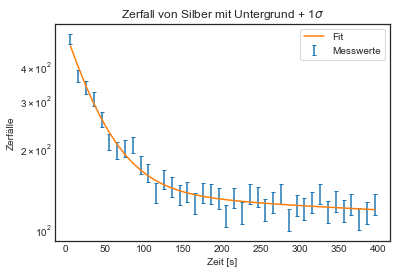

In [4]:
#silver, underground +1 Sigma
y0=mittelw_unterg + err_unterg

#fitting silver decay
popt, pcov=curve_fit(fit_func,t,N, p0=[391, 0.02, 44, 0.001], sigma=err_N)
perr = np.sqrt(np.diag(pcov))

#plot silver fit
plt.errorbar(t,N, err_N, linestyle='None', label = 'Messwerte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund + 1$\sigma$')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt), label = 'Fit')
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Silber+1.pdf', format='pdf')

#print fit parameters, silver
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%perr[1])
print("A2=%.2e"%popt[2], ", Standardfehler=%.1e"%perr[2])
print("l2=%.1e"%popt[3], ", Standardfehler=%.e"%perr[3])

#fit quality, silver
chi2_=np.sum((fit_func(t,*popt)-N)**2/err_N**2)
dof=len(N)-4
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

A1=4.00e+02 , Standardfehler=1.9e+01
l1=2.59e-02 , Standardfehler=2.3e-03
A2=5.58e+01 , Standardfehler=1.1e+01
l2=1.1e-03 , Standardfehler=7e-04
chi2_= 26.2301209453
chi2_red= 0.728614470702
Wahrscheinlichkeit= 88.0 %


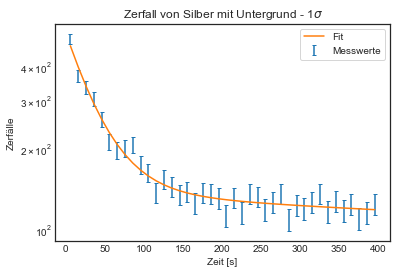

In [5]:
#silver, underground -1 Sigma
y0=mittelw_unterg - err_unterg

#fitting silver decay
popt, pcov=curve_fit(fit_func,t,N, p0=[391, 0.02, 44, 0.001], sigma=err_N)
perr = np.sqrt(np.diag(pcov))
#plot silver fit
plt.errorbar(t,N, err_N, linestyle='None', label = 'Messwerte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund - 1$\sigma$')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt), label = 'Fit')
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Silber-1.pdf', format='pdf')

#print fit parameters, silver
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%perr[1])
print("A2=%.2e"%popt[2], ", Standardfehler=%.1e"%perr[2])
print("l2=%.1e"%popt[3], ", Standardfehler=%.e"%perr[3])

#fit quality, silver
chi2_=np.sum((fit_func(t,*popt)-N)**2/err_N**2)
dof=len(N)-4
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

In [6]:
#indium decay

#adjust undergound
in_under = np.mean(12*unterg)
in_err=np.std(12*unterg)/np.sqrt(len(unterg))
print('Mittelwert des Untegrunds(Indium): ', in_under,'+-', in_err)


#load measured data indium
ind=np.loadtxt(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag\Daten/qtind.dat', usecols=[1])
ind_err = np.sqrt(ind)

#fit function, indium
def indium_fit(x, A1, l1):
    return A1*np.exp(-x*l1)+y0

Mittelwert des Untegrunds(Indium):  261.795918367 +- 8.96924169702


A1=7.73e+02 , Standardfehler=1.8e+01
l1=1.98e-04 , Standardfehler=1.8e-05
chi2_= 19.6190102924
chi2_red= 1.15405942896
Wahrscheinlichkeit= 29.0 %


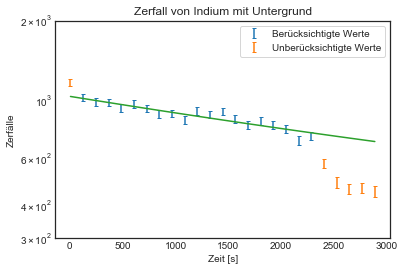

In [7]:
#fitting indium decay
y0 = in_under
t=np.arange(6, 3006, 120)
mask = [(t<2400) &(t>100)]
popt, pcov=curve_fit(indium_fit,t[mask],ind[mask], p0=[500, 0.0002], sigma=ind_err[mask])
perr = np.sqrt(np.diag(pcov))

#plot indium fit
plt.errorbar(t[mask], ind[mask], ind_err[mask], linestyle='None', label = 'Berücksichtigte Werte')
antimask = np.invert(mask[0])
plt.errorbar(t[antimask], ind[antimask], ind_err[antimask], linestyle='None', label = 'Unberücksichtigte Werte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.ylim(3e2, 2e3)
plt.plot(t,indium_fit(t,*popt))
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Indium.pdf', format='pdf')


#print fit parameters, indium
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%np.sqrt(pcov[1][1]))

#fit quality, indium
chi2_=np.sum((indium_fit(t[mask],*popt)-ind[mask])**2/ind_err[mask]**2)
dof=len(ind[mask])-2
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

A1=7.64e+02 , Standardfehler=1.8e+01
l1=2.01e-04 , Standardfehler=1.8e-05
chi2_= 19.6508546827
chi2_red= 1.1559326284
Wahrscheinlichkeit= 29.0 %


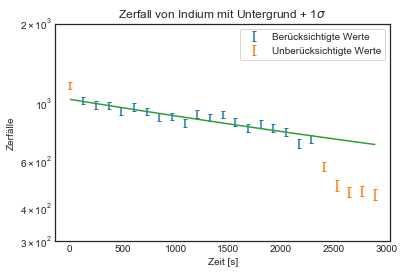

In [8]:
#indium, underground +1 Sigma
y0 = in_under + in_err

#fitting indium decay
t=np.arange(6, 3006, 120)
mask = [(t<2400) &(t>100)]
popt, pcov=curve_fit(indium_fit,t[mask],ind[mask], p0=[500, 0.0002], sigma=ind_err[mask])
perr = np.sqrt(np.diag(pcov))

#plot indium fit
plt.errorbar(t[mask], ind[mask], ind_err[mask], linestyle='None', label = 'Berücksichtigte Werte')
antimask = np.invert(mask[0])
plt.errorbar(t[antimask], ind[antimask], ind_err[antimask], linestyle='None', label = 'Unberücksichtigte Werte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund + 1$\sigma$')
plt.yscale('log')
plt.ylim(3e2, 2e3)
plt.plot(t,indium_fit(t,*popt))
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Indium+1.pdf', format='pdf')


#print fit parameters, indium
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%np.sqrt(pcov[1][1]))

#fit quality, indium
chi2_=np.sum((indium_fit(t[mask],*popt)-ind[mask])**2/ind_err[mask]**2)
dof=len(ind[mask])-2
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

A1=7.82e+02 , Standardfehler=1.8e+01
l1=1.96e-04 , Standardfehler=1.8e-05
chi2_= 19.588226588
chi2_red= 1.15224862282
Wahrscheinlichkeit= 30.0 %


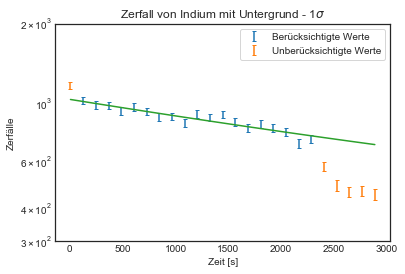

In [9]:
#indium, -1 Sigma
y0 = in_under - in_err

#fitting indium decay
t=np.arange(6, 3006, 120)
mask = [(t<2400) &(t>100)]
popt, pcov=curve_fit(indium_fit,t[mask],ind[mask], p0=[500, 0.0002], sigma=ind_err[mask])
perr = np.sqrt(np.diag(pcov))

#plot indium fit
plt.errorbar(t[mask], ind[mask], ind_err[mask], linestyle='None', label = 'Berücksichtigte Werte')
antimask = np.invert(mask[0])
plt.errorbar(t[antimask], ind[antimask], ind_err[antimask], linestyle='None', label = 'Unberücksichtigte Werte')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund - 1$\sigma$')
plt.yscale('log')
plt.ylim(3e2, 2e3)
plt.plot(t,indium_fit(t,*popt))
plt.legend(frameon = True)
plt.savefig(r'C:\Users\Quirinus\Dropbox\Universe\Praktikum\PAP 2.2\252 - Aktivierung von In und Ag/Diagramme/Indium+1.pdf', format='pdf')


#print fit parameters, indium
print("A1=%.2e"%popt[0], ", Standardfehler=%.1e"%perr[0])
print("l1=%.2e"%popt[1], ", Standardfehler=%.1e"%np.sqrt(pcov[1][1]))

#fit quality, indium
chi2_=np.sum((indium_fit(t[mask],*popt)-ind[mask])**2/ind_err[mask]**2)
dof=len(ind[mask])-2
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")